#**Customer Segmentation & Profit Analysis**

# Importing the data

In [46]:
import pandas as pd
transaction = pd.read_csv('transaction_data.csv')
purchase = pd.read_csv('purchase_behaviour.csv')

In [47]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [48]:
transaction.dtypes

,0
DATE,int64
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


In [49]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [50]:
purchase.dtypes

,0
LYLTY_CARD_NBR,int64
LIFESTAGE,object
PREMIUM_CUSTOMER,object


# Handling missing values and duplicate rows

In [51]:
transaction.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [52]:
purchase.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [53]:
transaction.duplicated().sum()

1

In [54]:
transaction = transaction.drop_duplicates()

In [55]:
transaction.duplicated().sum()

0

In [56]:
purchase.duplicated().sum()

0

# Converting data types

In [57]:
transaction["DATE"] = pd.to_datetime(transaction["DATE"])
transaction["PROD_NAME"] = transaction["PROD_NAME"].astype("category")
transaction.dtypes

,0
DATE,datetime64[ns]
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,category
PROD_QTY,int64
TOT_SALES,float64


In [58]:
purchase["LIFESTAGE"] = purchase["LIFESTAGE"].astype("category")
purchase["PREMIUM_CUSTOMER"] = purchase["PREMIUM_CUSTOMER"].astype("category")
purchase.dtypes

,0
LYLTY_CARD_NBR,int64
LIFESTAGE,category
PREMIUM_CUSTOMER,category


# Merging datasets

In [59]:
merged_data = transaction.merge(purchase, on="LYLTY_CARD_NBR")

In [60]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [61]:
merged_data.dtypes

,0
DATE,datetime64[ns]
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,category
PROD_QTY,int64
TOT_SALES,float64
LIFESTAGE,category
PREMIUM_CUSTOMER,category


# Top 3 Most Profitable Products

In [62]:
top_products = (
    merged_data.groupby("PROD_NAME")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

top_products

<ipython-input-62-e24c34c44bee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby("PROD_NAME")["TOT_SALES"]


,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme 380g,40352.0
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


*   Chips are the top-selling category, indicating strong customer demand.
*   Larger pack sizes (330g-380g) suggest family consumption, social gatherings, or bulk buying.
*   Focus on chip promotions, bundle deals, and in-store placements to maximize sales.

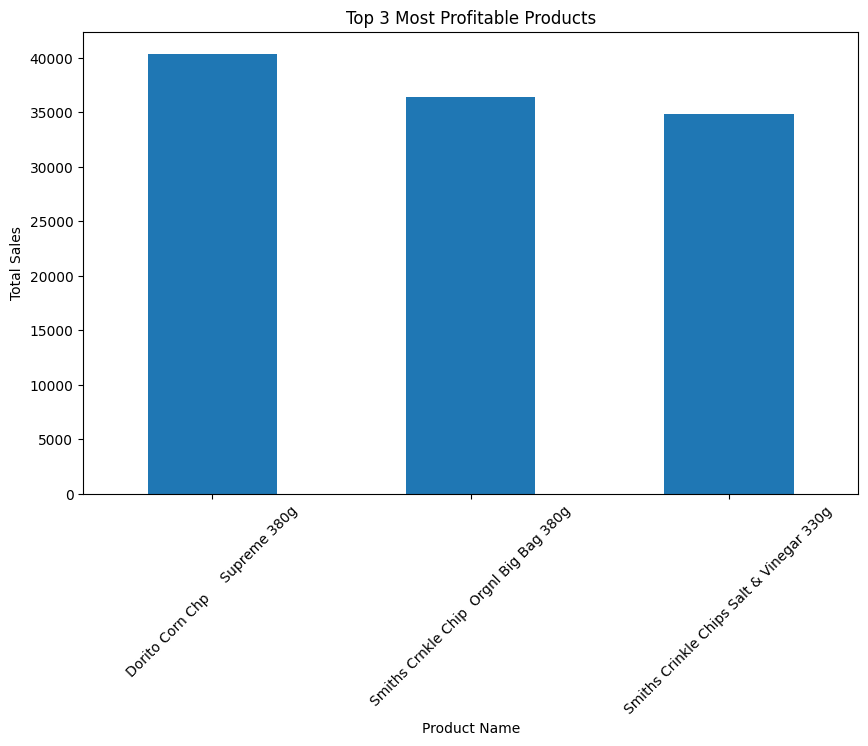

In [63]:
import matplotlib.pyplot as plt
top_products.plot(kind="bar", figsize=(10, 6))
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Most Loyal Customers (Highest Spending)

In [64]:
customer_loyalty = (
    merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum()
    .sort_values(ascending=False)
)

print("\nMost Profitable Customer Segments:\n", customer_loyalty.head())


Most Profitable Customer Segments:
 LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              168363.25
YOUNG SINGLES/COUPLES  Mainstream          157621.60
RETIREES               Mainstream          155677.05
YOUNG FAMILIES         Budget              139345.85
OLDER SINGLES/COUPLES  Budget              136769.80
Name: TOT_SALES, dtype: float64


<ipython-input-64-8fd2149337a4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum()


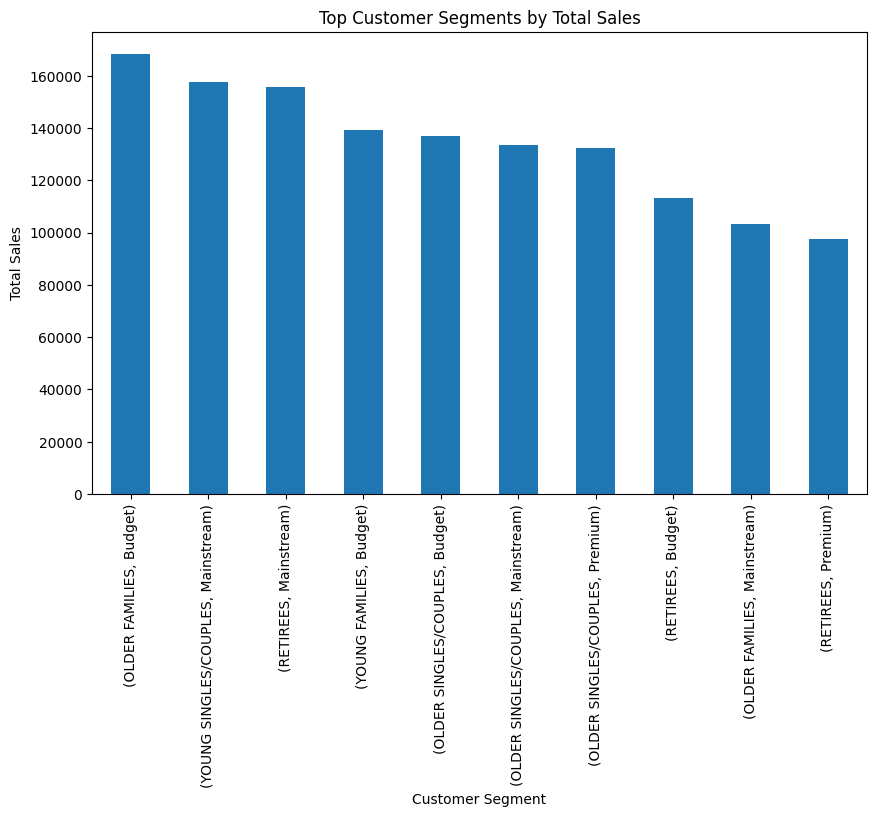

In [65]:
customer_loyalty.head(10).plot(kind="bar", figsize=(10, 6))
plt.title("Top Customer Segments by Total Sales")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

# Most Frequent Customer Segments (Unique Customers)

In [66]:
customer_frequency = (
    merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"]
    .nunique()
    .sort_values(ascending=False)
)

print("\nMost Frequent Customer Segments:\n", customer_frequency.head())


Most Frequent Customer Segments:
 LIFESTAGE              PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES  Mainstream          8088
RETIREES               Mainstream          6479
OLDER SINGLES/COUPLES  Mainstream          4930
                       Budget              4929
                       Premium             4750
Name: LYLTY_CARD_NBR, dtype: int64


<ipython-input-66-b05beaa2740e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"]


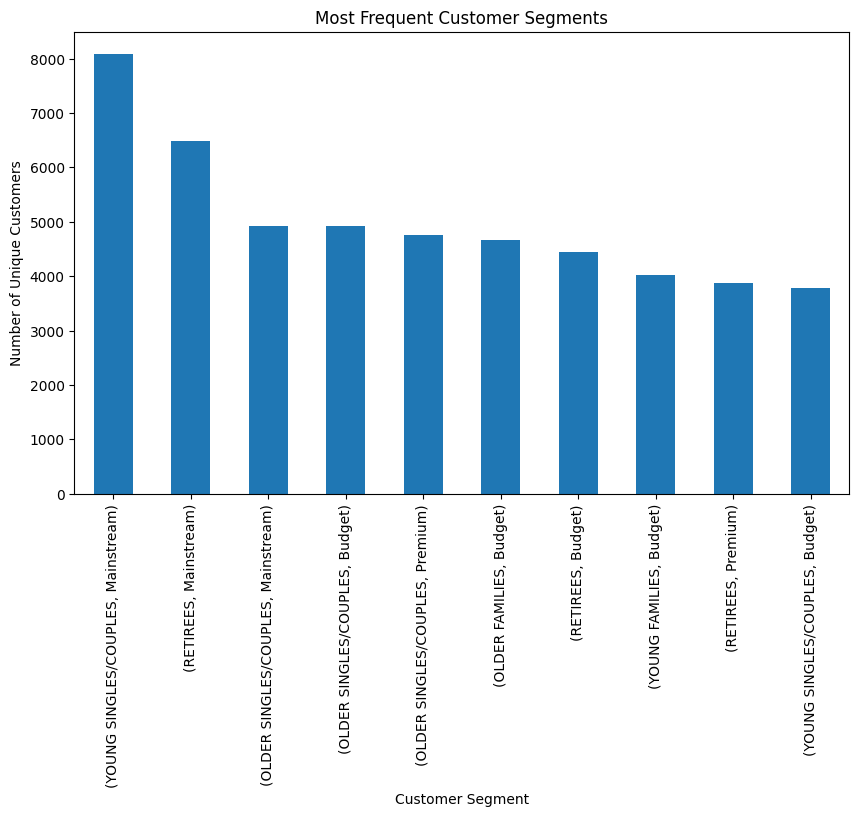

In [67]:
plt.figure(figsize=(10, 5))
customer_frequency.head(10).plot(kind="bar", figsize=(10,6))
plt.title("Most Frequent Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=90)
plt.show()

In [68]:
# Common customer segments in both Customer Loyalty and Most Frequent Customers lists
common_customers = customer_loyalty.head().index.intersection(customer_frequency.head().index)

print("Most Profitable Customer Segments (Appear in Both Customer Loyalty and Most Frequent Customers list)")
for lifestage, premium in common_customers:
    print(f"- {lifestage} ({premium})")

Most Profitable Customer Segments (Appear in Both Customer Loyalty and Most Frequent Customers list)
- YOUNG SINGLES/COUPLES (Mainstream)
- RETIREES (Mainstream)
- OLDER SINGLES/COUPLES (Budget)


# Hypothesis

*   **Young Singles/Couples** are likely busy professionals who enjoy branded, convenient snacks for their fast-paced lives. They might grab a quick bite for work, gym, or social hangouts. Offer trendy, premium products, snack bundles, and loyalty perks.

*   **Retirees (Mainstream)**  stick to familiar brands and look for good quality at a fair price. They probably shop in bulk to get the best value and avoid frequent trips. Offer bulk discounts, special senior deals, and loyalty rewards.

*   **Older Singles/Couples (Budget)** shop smart, choosing budget-friendly options while still being regular buyers. They may not buy in bulk but purchase consistently. Focus on affordable multipacks, discounts, and “buy more, save more” deals.



